## Creating Right Model

In [3]:
rightDatasetPath = 'dataset/alphabetaRight.csv'
leftDatasetPath = 'dataset/alphabetaLeft.csv'
rightSavePath = 'model/alphabetaRight.h5'
leftSavePath = 'model/alphabetaLeft.h5'
outputLeftSize = 14
outputRightSize = 27
import os
print(os.getcwd())
import os
print(os.getcwd())
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import csv

C:\Notebooks\ISL
C:\Notebooks\ISL


In [4]:
dataframe = pandas.read_csv(rightDatasetPath, header=None)
dataset = dataframe.values
X = dataset[:,0:40].astype(float)
Y = dataset[:,40]
Y_uni = []
for i in range(len(Y)):
    if Y[i] not in Y_uni:
        Y_uni.append(Y[i])
print(Y_uni)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=40, activation='relu'))
    model.add(Dense(outputRightSize, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


modelRight = baseline_model()
historyRight = modelRight.fit(X, dummy_y, epochs=100, batch_size=5)
modelRight.save(rightSavePath)

['a_right', 'b_right', 'c', 'e_right', 'f_right', 'g_right', 'i', 'j_right', 'k_right', 'l', 'n_right', 'p_right', 's_right', 'u', 'zz_0', 'zz_1', 'zz_2', 'zz_3', 'zz_4', 'zz_5', 'zz_6', 'zz_7', 'zz_8', 'zz_9', 'zz_v', 'zz_z', 'zz_w']
Epoch 1/100
5951/5951 [==============================] - 4s 676us/step - loss: 2.1306 - accuracy: 0.5036
Epoch 2/100
5951/5951 [==============================] - 4s 644us/step - loss: 0.4911 - accuracy: 0.9116
Epoch 3/100
5951/5951 [==============================] - 4s 693us/step - loss: 0.3100 - accuracy: 0.9335
Epoch 4/100
5951/5951 [==============================] - 4s 660us/step - loss: 0.2422 - accuracy: 0.9457
Epoch 5/100
5951/5951 [==============================] - 4s 663us/step - loss: 0.2100 - accuracy: 0.9520
Epoch 6/100
5951/5951 [==============================] - 4s 671us/step - loss: 0.1892 - accuracy: 0.9578
Epoch 7/100
5951/5951 [==============================] - ETA: 0s - loss: 0.1728 - accuracy: 0.96 - 4s 670us/step - loss: 0.1728 - accur

5951/5951 [==============================] - 4s 659us/step - loss: 0.0478 - accuracy: 0.9847
Epoch 76/100
5951/5951 [==============================] - 4s 669us/step - loss: 0.0466 - accuracy: 0.9858
Epoch 77/100
5951/5951 [==============================] - 4s 629us/step - loss: 0.0468 - accuracy: 0.9850
Epoch 78/100
5951/5951 [==============================] - 4s 644us/step - loss: 0.0461 - accuracy: 0.9857
Epoch 79/100
5951/5951 [==============================] - 4s 680us/step - loss: 0.0463 - accuracy: 0.9863
Epoch 80/100
5951/5951 [==============================] - 4s 672us/step - loss: 0.0491 - accuracy: 0.9858
Epoch 81/100
5951/5951 [==============================] - 4s 704us/step - loss: 0.0459 - accuracy: 0.9866
Epoch 82/100
5951/5951 [==============================] - 5s 838us/step - loss: 0.0487 - accuracy: 0.9854
Epoch 83/100
5951/5951 [==============================] - 4s 696us/step - loss: 0.0459 - accuracy: 0.9853
Epoch 84/100
5951/5951 [==============================] - 4

<br>

## Create Left Model

In [5]:
dataframe = pandas.read_csv(leftDatasetPath, header=None)
dataset = dataframe.values
X = dataset[:,0:40].astype(float)
Y = dataset[:,40]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=40, activation='relu'))
    model.add(Dense(outputLeftSize, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


modelLeft = baseline_model()
historyLeft = modelLeft.fit(X, dummy_y, epochs=100, batch_size=5)
modelLeft.save(leftSavePath)

Epoch 1/100
3328/3328 [==============================] - 3s 650us/step - loss: 2.1108 - accuracy: 0.4015
Epoch 2/100
3328/3328 [==============================] - 2s 612us/step - loss: 0.6301 - accuracy: 0.9032
Epoch 3/100
3328/3328 [==============================] - 2s 613us/step - loss: 0.3201 - accuracy: 0.9455
Epoch 4/100
3328/3328 [==============================] - 2s 660us/step - loss: 0.2528 - accuracy: 0.9478
Epoch 5/100
3328/3328 [==============================] - 2s 618us/step - loss: 0.2249 - accuracy: 0.9522
Epoch 6/100
3328/3328 [==============================] - 2s 627us/step - loss: 0.1857 - accuracy: 0.9604
Epoch 7/100
3328/3328 [==============================] - 2s 609us/step - loss: 0.1753 - accuracy: 0.9570
Epoch 8/100
3328/3328 [==============================] - 2s 668us/step - loss: 0.1729 - accuracy: 0.9601
Epoch 9/100
3328/3328 [==============================] - 2s 646us/step - loss: 0.1672 - accuracy: 0.9627
Epoch 10/100
3328/3328 [==============================]

3328/3328 [==============================] - 2s 655us/step - loss: 0.0573 - accuracy: 0.9851
Epoch 79/100
3328/3328 [==============================] - 2s 665us/step - loss: 0.0634 - accuracy: 0.9840
Epoch 80/100
3328/3328 [==============================] - 2s 686us/step - loss: 0.0604 - accuracy: 0.9843
Epoch 81/100
3328/3328 [==============================] - 2s 650us/step - loss: 0.0578 - accuracy: 0.9847
Epoch 82/100
3328/3328 [==============================] - 2s 649us/step - loss: 0.0536 - accuracy: 0.9853
Epoch 83/100
3328/3328 [==============================] - 2s 643us/step - loss: 0.0613 - accuracy: 0.9833
Epoch 84/100
3328/3328 [==============================] - 2s 643us/step - loss: 0.0516 - accuracy: 0.9855
Epoch 85/100
3328/3328 [==============================] - 2s 645us/step - loss: 0.0564 - accuracy: 0.9844
Epoch 86/100
3328/3328 [==============================] - 2s 638us/step - loss: 0.0508 - accuracy: 0.9877
Epoch 87/100
3328/3328 [==============================] - 2

### Plotting Accuracy and Loss

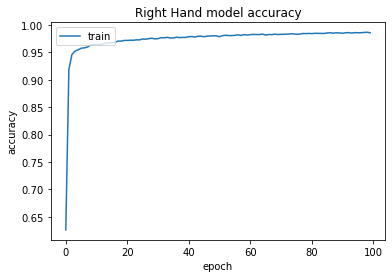

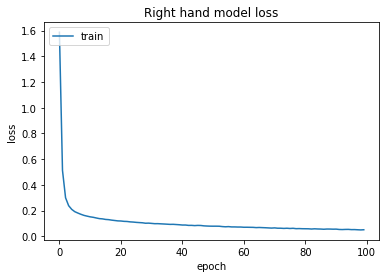

In [6]:
#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(historyLeft.history['accuracy'])
plt.title('Right Hand model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyLeft.history['loss'])
plt.title('Right hand model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

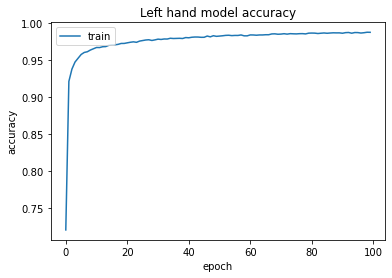

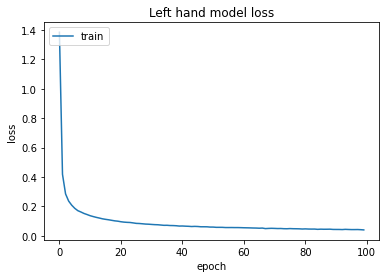

In [7]:
#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(historyRight.history['accuracy'])
plt.title('Left hand model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyRight.history['loss'])
plt.title('Left hand model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()